In [0]:
# from google.colab import drive

In [2]:
# drive.mount("AshLit")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at AshLit


In [0]:
# import os

In [ ]:
# os.listdir("AshLit/My Drive/AshLit/house-prices-advanced-regression-techniques/")

In [0]:
PATH = "" #"AshLit/My Drive/AshLit/house-prices-advanced-regression-techniques/"

# Goal: predict house price.

## SalePrice -> feature to be predicted i.e. y.

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
train_df = pd.read_csv(PATH+"train.csv")

In [135]:
train_df.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [136]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


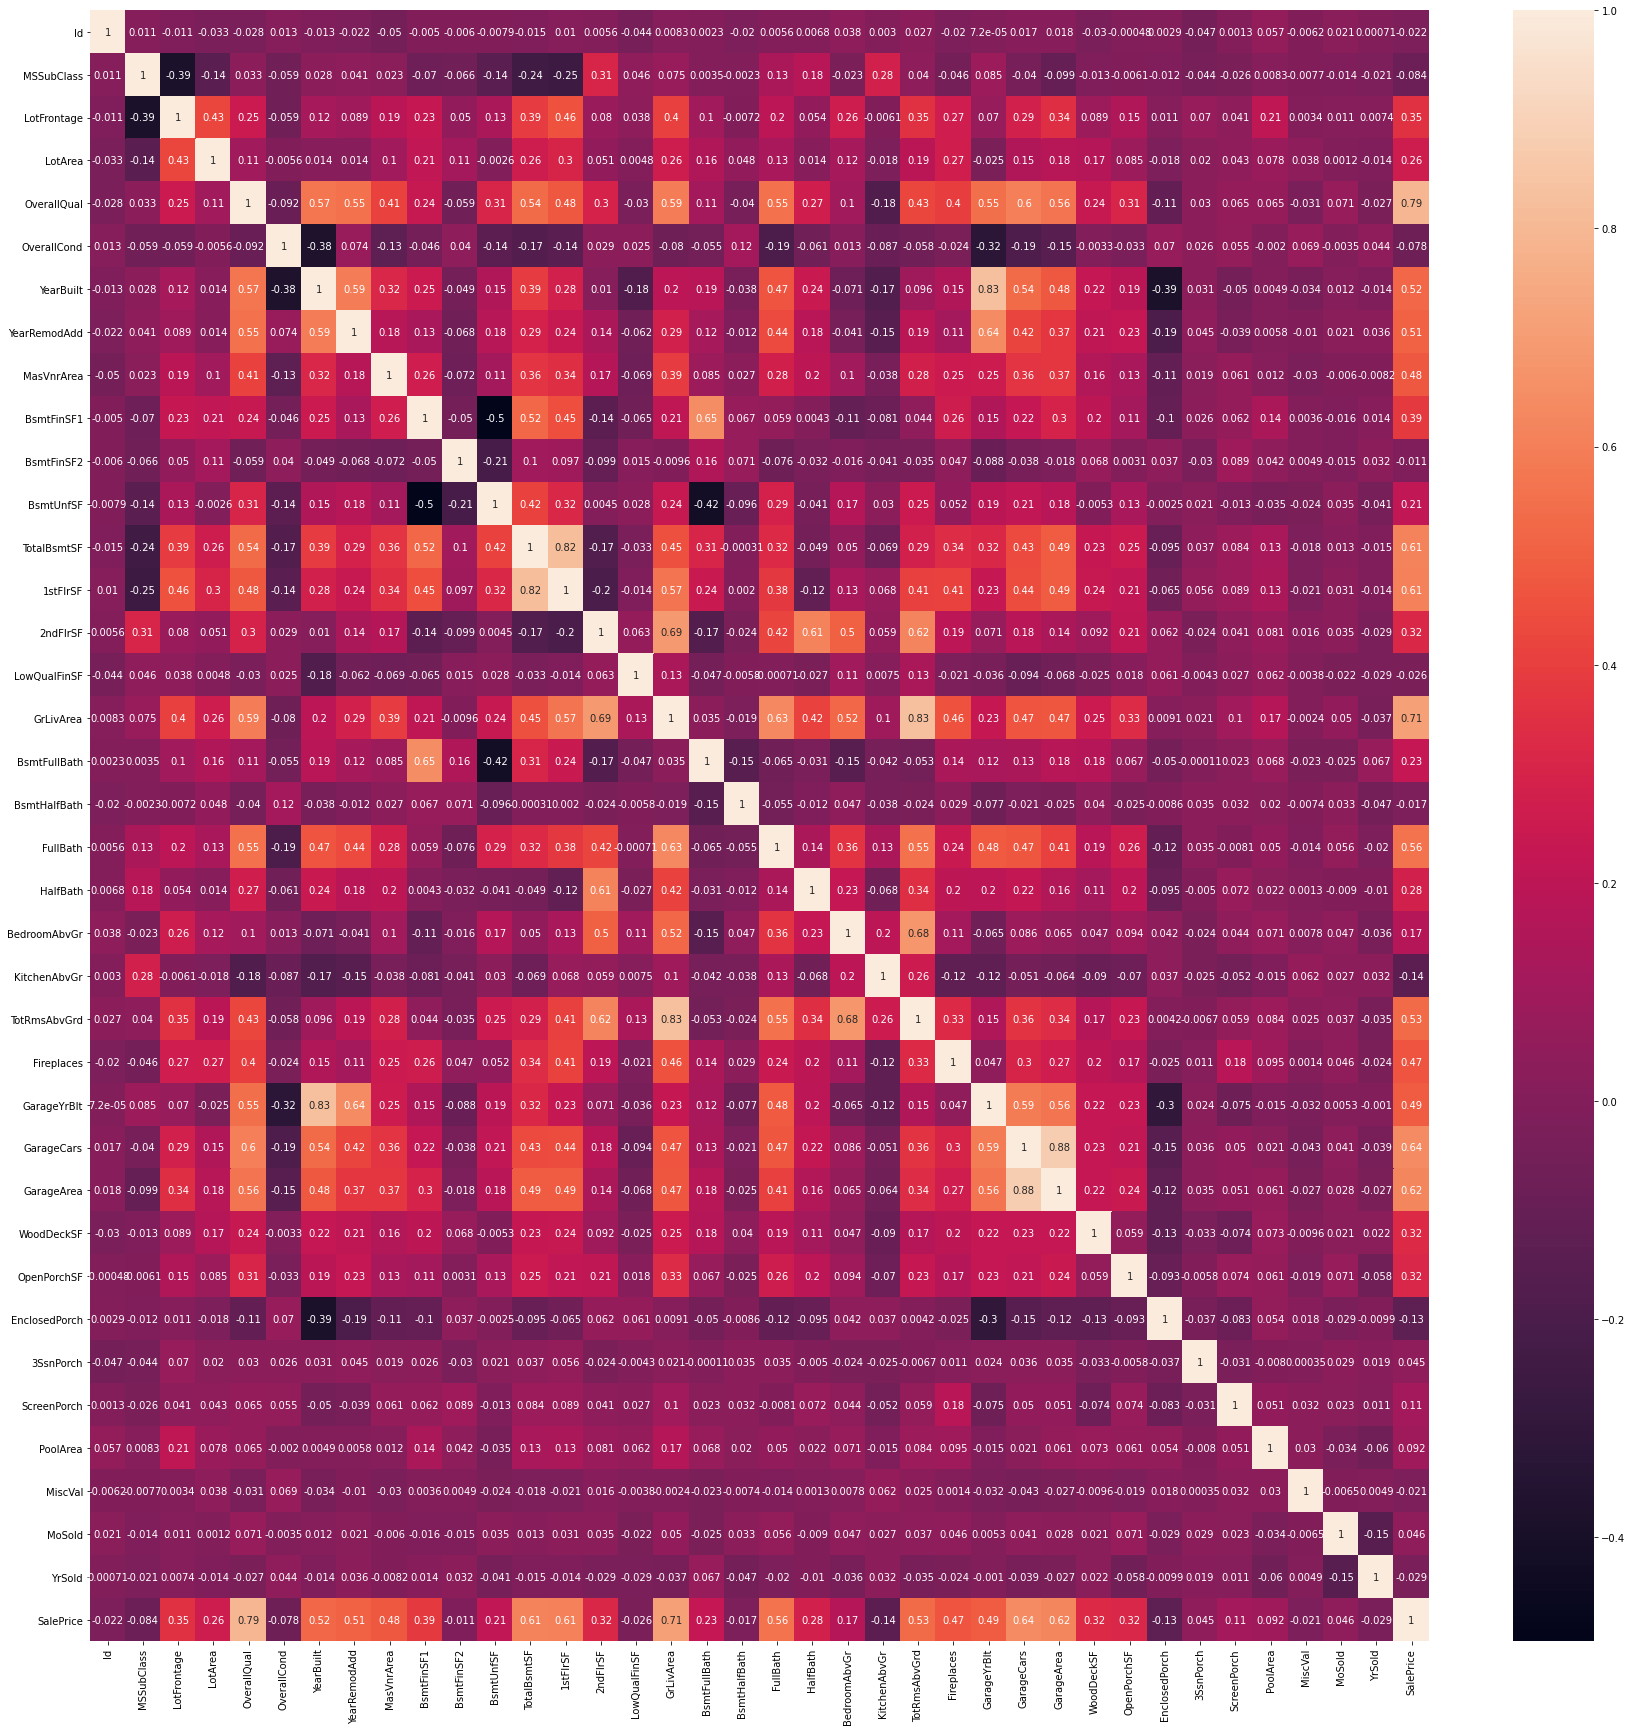

In [137]:
plt.figure(figsize=(30,30))
sns.heatmap(train_df.corr(), annot=True)

In [0]:
def get_high_corr_columns(df=None, threshold = 0.5):
    corr_matrix = df.corr()
    col_list = corr_matrix.keys().drop(["SalePrice"]).to_list()
    result_col = [col for col in col_list if abs(train_df["SalePrice"].corr(train_df[col])) >= threshold]
    # plt.figure(figsize=(30,30))
    # sns.heatmap(train_df.corr(), annot=True)
    return result_col

In [0]:
train_df["diff_year_sold_built"] = train_df["YrSold"]-train_df["YearBuilt"]

In [140]:
get_high_corr_columns(train_df, threshold=0.5)

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'diff_year_sold_built']

In [0]:
train_df["year_remod_sold_diff"] = abs(train_df["YearBuilt"] - train_df["YearRemodAdd"])

In [0]:
result_col = get_high_corr_columns(train_df, threshold=0.5)

In [0]:
subset_df = train_df[result_col]

In [144]:
subset_df

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,diff_year_sold_built
0,7,2003,2003,856,856,1710,2,8,2,548,5
1,6,1976,1976,1262,1262,1262,2,6,2,460,31
2,7,2001,2002,920,920,1786,2,6,2,608,7
3,7,1915,1970,756,961,1717,1,7,3,642,91
4,8,2000,2000,1145,1145,2198,2,9,3,836,8
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,8
1456,6,1978,1988,1542,2073,2073,2,7,2,500,32
1457,7,1941,2006,1152,1188,2340,2,9,1,252,69
1458,5,1950,1996,1078,1078,1078,1,5,1,240,60


In [0]:
object_col = [col for col in train_df.keys() if train_df[col].dtypes==object]

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [0]:
le = LabelEncoder()
si = SimpleImputer(strategy="most_frequent")
si_n = SimpleImputer(strategy="median", verbose=1)
skf = StratifiedKFold(n_splits=5, random_state=69, shuffle=True)

In [0]:
import copy

In [149]:
set(train_df.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [0]:
object_col = train_df.select_dtypes(["O"]).keys()

In [0]:
for col in object_col:
  train_df[col] = si.fit_transform(train_df[[col]])

In [0]:
n_col = train_df.select_dtypes(["int64", "float64"]).keys()

In [0]:
for col in n_col:
  train_df[col] = si_n.fit_transform(train_df[[col]])

In [154]:
sum(train_df.isna().any())

0

In [155]:
for col in object_col:
  train_df[col] = le.fit_transform(train_df[[col]].values)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [156]:
set(train_df.dtypes)

{dtype('int64'), dtype('float64')}

In [0]:
req = get_high_corr_columns(train_df, threshold=0.5)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier()


In [164]:
y_train = train_df["SalePrice"].values
x_train = train_df[req].values
for train_index, test_index in skf.split(x_train, y_train):
    x_train_, x_test_ = x_train[train_index], x_train[test_index]
    y_train_, y_test_ = y_train[train_index], y_train[test_index]
    model = rf.fit(x_train_, y_train_)
    print(model.score(x_test_, y_test_))
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# scores = cross_validate(clf, x_train, y_train, scoring=scoring)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.0136986301369863
0.003424657534246575
0.02054794520547945
0.017123287671232876
0.00684931506849315


In [165]:
model.score(x_train, y_train)

0.7972602739726027

In [0]:
test_df = pd.read_csv(PATH+"test.csv")

In [167]:
sum(test_df.isna().any())

33

In [168]:
object_col = [col for col in test_df.keys() if test_df[col].dtypes==object]
n_col = test_df.select_dtypes(["int64", "float64"]).keys()
for col in object_col:
  test_df[col] = si.fit_transform(test_df[[col]])
for col in n_col:
  test_df[col] = si_n.fit_transform(test_df[[col]])
for col in object_col:
  test_df[col] = le.fit_transform(test_df[[col]].values)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
test_df["diff_year_sold_built"] = test_df["YrSold"]-test_df["YearBuilt"]
test_df = test_df[['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'ExterQual',
 'BsmtQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'diff_year_sold_built']
]
x_test = test_df.values

In [0]:
result = model.predict(x_test)

In [171]:
result

array([128500., 150000., 181000., ..., 148000.,  93500., 225000.])

In [0]:
sub = pd.read_csv(PATH+"sample_submission.csv")

In [173]:
sub.head(5)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [0]:
sub["SalePrice"] = result

In [0]:
sub.to_csv(PATH+"second_attempt.csv", index=False)

In [176]:
sub.head(5)

,Id,SalePrice
0,1461,128500.0
1,1462,150000.0
2,1463,181000.0
3,1464,181000.0
4,1465,189000.0


In [0]:
def si